# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 5</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

### Exercise 5.1

The aim of lesson five is to implement a Metropolis algorithm code to sample the probability density $|\Psi(\vec{r},t)|^2$ of a non-relativistic spinless electron of hydrogen atom in the ground state ( $\Psi_{1,0,0}(r,\theta,\phi)$ ) and in $2p$ excited state ( $\Psi_{2,1,0}(r,\theta,\phi)$ ) in cartesian coordinate.

Below are reported pictures of estimations of  $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties (calculated with blocking method) in Bohr radius units, as a function of the number of blocks.
Results are obtained using an uniform transition probability $T(\vec{x}|\vec{y})$ with a step chosen in order to obtain 50% of acceptance.

For this simulation I chose to use $100$ steps of equilibration for both states (this should be a safe choice, see below), $100$ blocks of $10^4$ steps and a starting point of $(1,1,1)$ that results in a distance from the origin close to the equilibrium value.

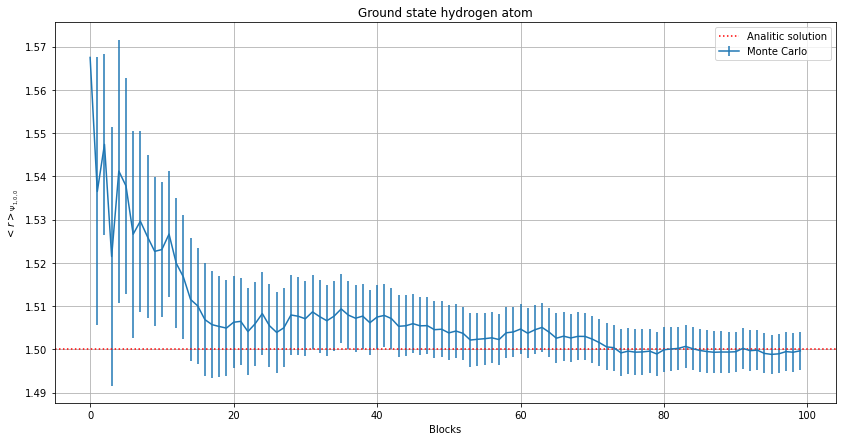

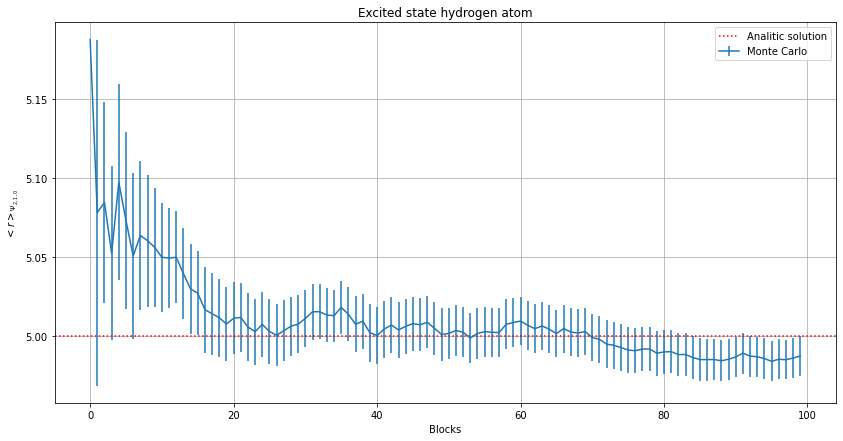

In [24]:
plt.figure(1, figsize = (14, 7))
y_1s, yerr_1s = np.loadtxt("../results/average_radius_100_state.dat", delimiter = " ", unpack = True)
blocks = np.arange(0,100)

plt.title("Ground state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_1s, yerr_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
y_2p, yerr_2p = np.loadtxt("../results/average_radius_210_state.dat", delimiter = " ", unpack = True)

plt.title("Excited state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_2p, yerr_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.show()

Results obtained seem to be compatible with expectations value of $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$ (remember that $a_0=1$ because we are using Bohr radius units).

I can also see how the sampled points are distributed in the space plotting them directly: 

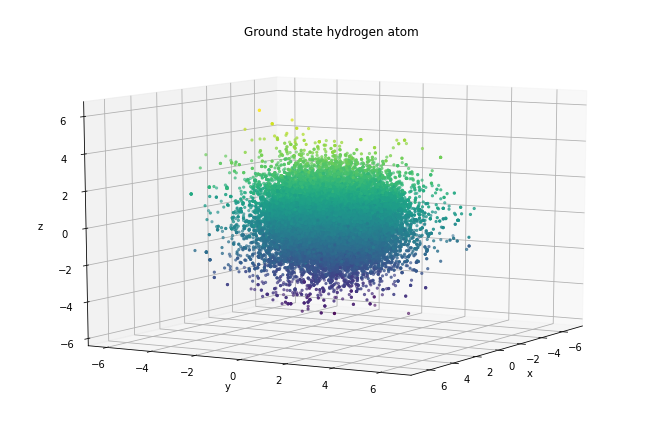

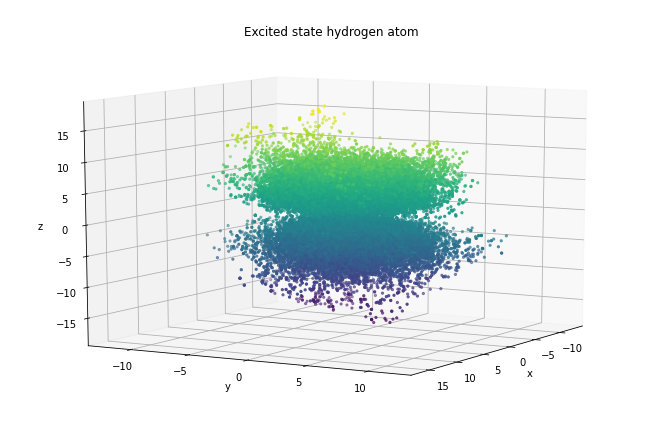

In [60]:
X_1s, Y_1s, Z_1s = np.loadtxt("../results/sampled_points_100_state.dat", delimiter = " ", unpack = True)
X_2p, Y_2p, Z_2p = np.loadtxt("../results/sampled_points_210_state.dat", delimiter = " ", unpack = True)

fig = plt.figure(1, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_1s, Y_1s, Z_1s, c=Z_1s, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Ground state hydrogen atom")

fig = plt.figure(2, figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(X_2p, Y_2p, Z_2p, c=Z_2p, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("Excited state hydrogen atom")

plt.show()

We can see that the sample points form the expected orbitals of the hydrogen atom.

#### What happens if we start very far from the origin?

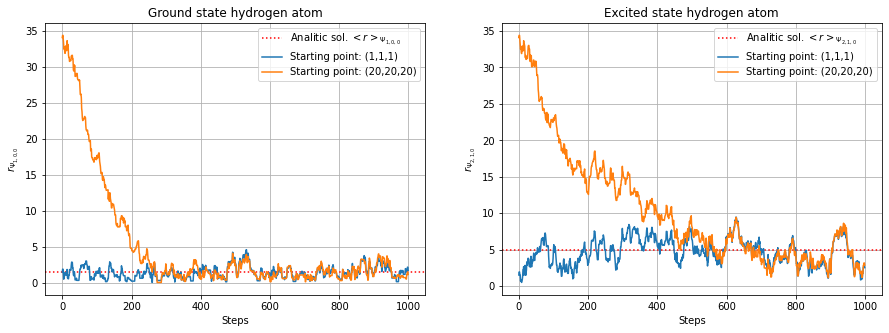

In [47]:
steps = np.arange(0,1000)
y_1s_near = np.loadtxt("../results/test_start_near_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_1s_far = np.loadtxt("../results/test_start_far_from_origin_100_state.dat", delimiter = " ", unpack = True)
y_2p_near = np.loadtxt("../results/test_start_near_from_origin_210_state.dat", delimiter = " ", unpack = True)
y_2p_far = np.loadtxt("../results/test_start_far_from_origin_210_state.dat", delimiter = " ", unpack = True)

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic sol. $< r >_{\Psi_{1,0,0}}$")
plt.plot(steps, y_1s_near, label = "Starting point: (1,1,1)")
plt.plot(steps, y_1s_far, label = "Starting point: (20,20,20)")

plt.title("Ground state hydrogen atom")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{1,0,0}}$')
plt.grid(True)
plt.legend()

plt.subplot(122)

plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic sol. $< r >_{\Psi_{2,1,0}}$")
plt.plot(steps, y_2p_near, label = "Starting point: (1,1,1)")
plt.plot(steps, y_2p_far, label = "Starting point: (20,20,20)")

plt.title("Excited state hydrogen atom")
plt.xlabel('Steps')
plt.ylabel('$ r _{\Psi_{2,1,0}}$')
plt.grid(True)
plt.legend()

plt.show()

Starting far from the origin results in having `longer equilibration time`!
In the example above we can observe that in the case of starting point $(1,1,1)$ (the case of the previous simulation) we don't observe a visible out-of-equilibrium transient and $100$ steps of equilibration are surely enough.
In the case of starting point $(20,20,20)$ I need at least $300$ equilibration steps for the ground state and $500$ equilibration steps for the excited state.

#### How large should be the number of Monte Carlo Metropolis steps in each block?

Correletion lenght 1s state =  10.426195136712991
Correletion lenght 2p state =  19.74761402067159


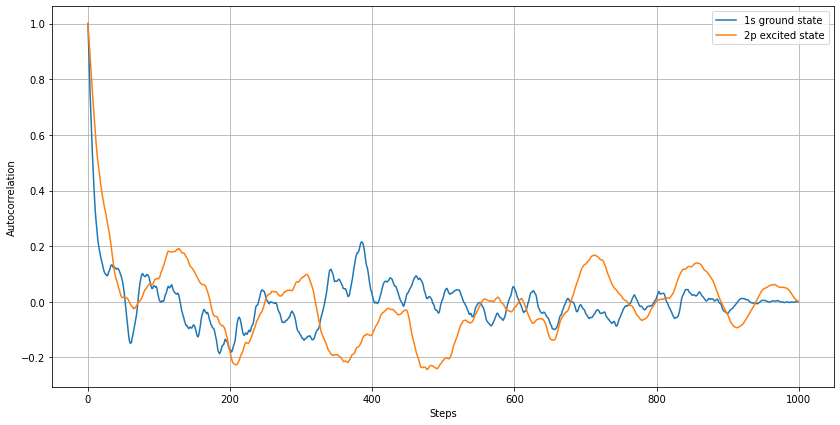

In [51]:
def autocorrelation(series, lag):
    n = len(series)
    mean = 0.
    for x in series:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - lag):
        c += (series[i] - mean)*(series[i + lag] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (series[i] - mean)*(series[i] - mean)

    return (c / n)/(autocovariance/n)

def exp_fit(t, t0):
    return np.exp(-t / t0)

pos1s = np.loadtxt("../results/test_start_near_from_origin_100_state.dat")
pos2p = np.loadtxt("../results/test_start_near_from_origin_210_state.dat")

corr1s = [autocorrelation(pos1s, t) for t in range(1000)]
corr2p = [autocorrelation(pos2p, t) for t in range(1000)]

plt.figure(1, figsize = (14, 7))

corr_lenght_1s, var_1s = optimize.curve_fit(exp_fit, np.arange(1000), corr1s)
corr_lenght_2p, var_2p = optimize.curve_fit(exp_fit, np.arange(1000), corr2p)

plt.plot(corr1s, label="1s ground state")
plt.plot(corr2p, label="2p excited state")
plt.xlabel('Steps')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.legend()

print("Correletion lenght 1s state = ", corr_lenght_1s[0])
print("Correletion lenght 2p state = ", corr_lenght_2p[0])

Using previously obtained data, I calculated the autocorrelation functions of $\left\langle r \right\rangle$ and fitted it with an exponential function to obtain the Monte Carlo correlation time to estimate the minimum size of the blocks to use for my simulation.
Results are of the order of ten and show that my previous choice of $10^4$ steps-per-block should be a safe choice.

#### If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

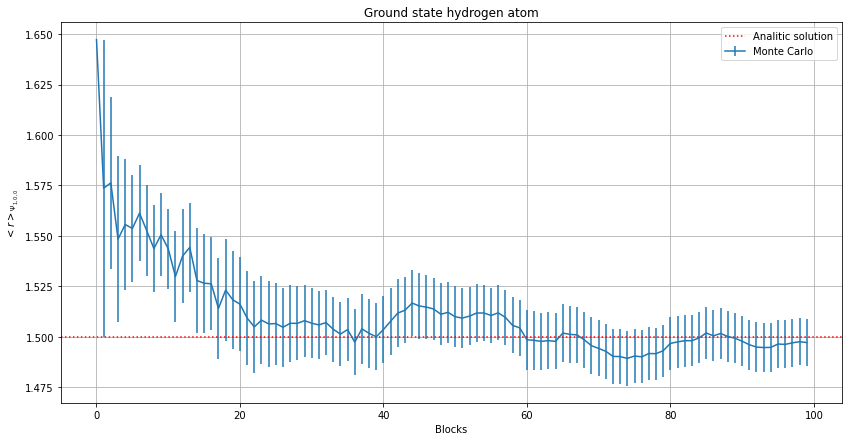

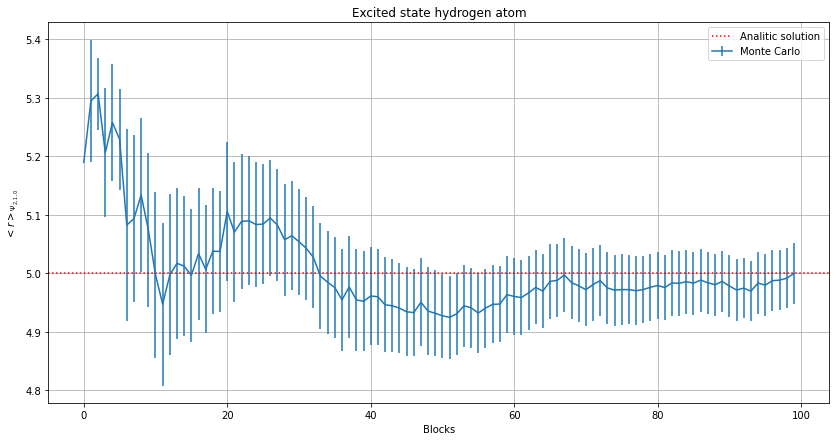

In [55]:
plt.figure(1, figsize = (14, 7))
y_1s, yerr_1s = np.loadtxt("../results/average_radius_100_state_gauss.dat", delimiter = " ", unpack = True)
blocks = np.arange(0,100)

plt.title("Ground state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{1,0,0}}$')
plt.axhline(y=1.5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_1s, yerr_1s, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (14, 7))
y_2p, yerr_2p = np.loadtxt("../results/average_radius_210_state_gauss.dat", delimiter = " ", unpack = True)

plt.title("Excited state hydrogen atom")
plt.xlabel('Blocks')
plt.ylabel('$< r >_{\Psi_{2,1,0}}$')
plt.axhline(y=5, color='r', linestyle="dotted", label = "Analitic solution")
plt.errorbar(blocks, y_2p, yerr_2p, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.show()

Using in both cases a Gaussian with mean$=0$ and variance$=1$ I obtain an acceptance rate circa $50%$ and the averages don't show remarkable differences from the one obtained with a uniform step.